# O Sol e o Sistema Solar


:::{figure} ../../00_images/oort.jpg
:label: sistema_solar
:width: 100%
:::

:::{figure} ../../00_images/sun.webp
:label: estruturas_solares//
:width: 100%
:::

## Alguns conceitos de fotometria

- **Brilho**, ou **Intensidade** de uma fonte luminosa não depende da distância, o **fluxo** depende da distância.

$$
dP = \frac{dE}{dt} = I_\nu \cos \theta d\sigma d\Omega d\nu
$$

- Brilho é o mesmo ma fonte e no detector, é uma fluxo de energia emergindo da fonte ou sendo coletadfo no receptor.
- Nenhum instrumento ótico aumenta o brilho dos objetos.

Se temos uma fonte resolvida, com determinado tmanho angular, podemos definir a densidade espectral de fluxo

$$
\frac{dP}{d\sigma d\nu} = I_\nu \cos \theta d\Omega \\
S_\nu = \int I_\nu(\theta, \phi) \cos\theta d\Omega
$$

O fluxo espectral depende com o quadrado da distância

A luminosidade (espectral) é a potência total irradiada pela fonte (por unidade de frequência)

$$
L_\nu = 4 \pi d^2 S_\nu \\
L = \int L_\nu d\nu
$$

Para o corpo negro, deduzimos a densidade de energia espectral, mas temos uma relação entre esta e o brilho#: 

$$
u_\nu = \frac{1}{c}\int I_\nu d\Omega \\
u_\nu = \frac{4\pi}{c} B_\nu
$$

<h2 class="section">Fluxos e Magnitudes</h2>

- **Brilho - Intensidade específica**

$$ 
B_\lambda(T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k T}} - 1} \\
B_\nu(T) = \frac{2h\nu^3}{c^2} \frac{1}{e^{\frac{h\nu}{ k T}} - 1}
$$

- Dimensão:

$$ \left[B_\lambda\right] = \frac{\left[\mathrm{E}\right]}{\left[d\Omega\right] \left[dt\right] \left[dS\right] \left[\mathrm{d\lambda}\right]} \\
\left[B_\nu\right] = \frac{\left[\mathrm{E}\right]}{\left[d\Omega\right] \left[dt\right] \left[dS\right] \left[\mathrm{d\nu}\right]}
$$

- Unidades: 

$$ W m^{-2} m^{-1} \mathrm{sr}^{-1} \;\;\;\;\; \mathrm{erg} s^{-1} \mathrm{cm}^{-2} \AA^{-1} \mathrm{sr}^{-1} \;\;\;\;\; \mathrm{foton}\; s^{-1} \mathrm{cm}^{-2} \AA^{-1} \mathrm{sr}^{-1} $$
  
$$ W m^{-2} \mathrm{Hz}^{-1} \mathrm{sr}^{-1} \;\;\;\;\; \mathrm{erg} s^{-1} \mathrm{cm}^{-2} \mathrm{Hz}^{-1} \mathrm{sr}^{-1} \;\;\;\;\; \mathrm{foton} \;s^{-1} \mathrm{Hz}^{-1} \AA^{-1} \mathrm{sr}^{-1}$$

- **Densidade de Fluxo Espectral**

$$ 
F_\nu = \iint_\Omega B_\nu \cos\theta d\Omega \\
F_\lambda = \iint_\Omega B_\lambda \cos\theta d\Omega
$$

- **Densidade de Fluxo do Corpo Negro**

$$ 
F = \frac{\pi R_\odot^2}{d^2}, \\
d = 1 \mathrm{AU} \;\;\; \textrm{ou} \;\;\; d = 1 \mathrm{kpc}
$$

- **Unidades**
$$
W m^{-3}\\
\mathrm{erg} s^{-1} \mathrm{cm}^{-2} \AA^{-1} \\
\mathrm{foton} s^{-1} \mathrm{cm}^{-2} \AA^{-1} \\
W m^{-2} \mathrm{Hz}^{-1} \\
\mathrm{Jy} = 10^{-26} \;W m^{-2} \mathrm{Hz}^{-1} = 10^{-23} \;\mathrm{erg} s^{-1} \mathrm{cm}^{-2} \mathrm{Hz}^{-1}\\
\mathrm{SFU} = 10^{-22} \;W m^{-2} \mathrm{Hz}^{-1} \\
\mathrm{erg} s^{-1} \mathrm{cm}^{-2} \mathrm{Hz}^{-1} \\
\mathrm{foton}\; s^{-1} \mathrm{cm}^{-2} \mathrm{Hz}^{-1} 
$$

**Magnitudes**

$$m = m_0 - 2.5 \log \left(\frac{F(\lambda)}{F_0(\lambda)}\right)$$

In [1]:
import sys 
sys.path.append('../')
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import src.astroufcg.astro.SPECUTILS as utils
%matplotlib inline
%load_ext rich

In [2]:

# Download dos arquivos de dados
urls = []
filenames = []
# URL of STScI Solar Spectrum
# Espectro solar de referência
urls.append("https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/solsys/solar_spec.fits")
filenames.append("../data/spectra/solar_spec.fits")
# Espectro solar para calibração HST
urls.append("https://archive.stsci.edu/hlsps/reference-atlases/cdbs/calspec/sun_reference_stis_002.fits")
filenames.append("../data/spectra/solar_spectrum_cal.fits")
# Spectro solar de alta resolução
urls.append(r"https://vizier.cds.unistra.fr/viz-bin/getCatFile?-plus=-%2b&VI/159/./sp/Spectre_HR_LATMOS_Meftah_V1.txt")
filenames.append("../data/spectra/solar_spectrum_HR.txt")
# Linhas espectrais do Sol
urls.append("https://mark4sun.jpl.nasa.gov/toon/solar/solar_merged.108.gz")
filenames.append("../data/spectra/solar_lines.gz")
# for url, name in zi/p(urls, filenames):
#     utils.download_file(url, name)
    
# Gera espectros de specutils e synphot
spectra = utils.generate_spectra(filenames=filenames)

# Visualizando os espectros
utils.show_spectra_units(spectra)

# Ajuste de Corpo Negro
bb_spectra = utils.fit_blackbody(spectra["HST"]["specutils"], 5700, scale=utils.scale)

Datasets carregados em pandas dataframes.


        Use Spectrum instead. [src.astroufcg.astro.SPECUTILS]
        Use Spectrum instead. [specutils.spectra.spectrum_mixin]


### Espectros Gerados

<table style="border-collapse: collapse; width: 100%;">
  <tr style='background-color: #222222; color: white;'>
    <th>Dataset</th><th>specutils Units</th><th>synphot Units</th>
  </tr>
  <tr style='color: goldenrod;'>
    <td>HST</td><td>nm   X   W / (nm m2)</td><td>Angstrom   X   1e+14 ph / (s m3)</td>
  </tr>
  <tr style='color: slateblue;'>
    <td>HR</td><td>nm   X   W / (nm m2)</td><td>Angstrom   X   1e+14 ph / (s m3)</td>
  </tr>
</table>


        Use Spectrum instead. [src.astroufcg.astro.SPECUTILS]
        Use Spectrum instead. [specutils.spectra.spectrum_mixin]
        Use Spectrum instead. [src.astroufcg.astro.SPECUTILS]
        Use Spectrum instead. [specutils.spectra.spectrum_mixin]


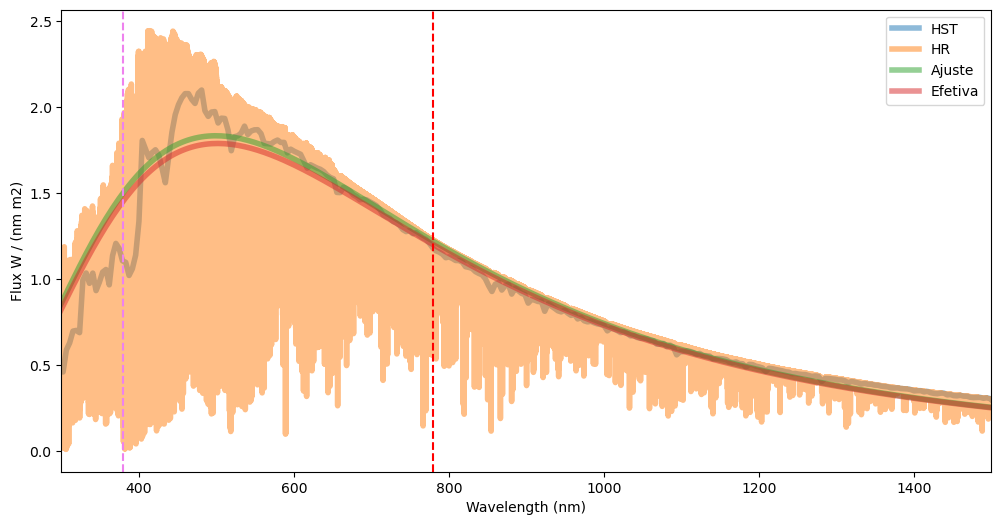

In [ ]:
spectra.update(bb_spectra["Spectra"])
utils.plot_spectra(spectra, range=[300, 1500]);

In [5]:
# filters = utils.get_filters()
# utils.plot_filters(filters);

In [6]:
# observations = utils.make_observations(spectra)
# utils.plot_observations(observations["HST"]);

## Estimando as propriedades do Sol

### Pressão:
$$\frac{dP}{dr} = -\frac{Gm}{r^2}\rho \Rightarrow P_c \approx \frac{3 GM^2}{4\pi R^4} \\
T_c = \frac{P_c \mu m_H}{\rho k}

$$


In [ ]:
import astropy.constants as const
P_sun = 3 * const.G * utils.m_sun**2 / (4 * np.pi * utils.r_sun**4)
from IPython.display import display, Math, Latex

formatted_value = np.format_float_scientific(P_sun / const.atm, precision=2, exp_digits=1)
# Display the result
display(
    Math(
        r"P_{\odot} = \frac{3 G M_{\odot}^2}{4 \pi R_{\odot}^4} = "
        + formatted_value.replace("e", " \\times 10^{")
        + "}"
        + r"atm"
    )
)

T_sun = P_sun * 0.62 * const.m_p / (const.k_B * (utils.m_sun / (4 / 3 * np.pi * utils.r_sun**3)))
from IPython.display import display, Math, Latex

formatted_value = np.format_float_scientific(T_sun.value, precision=2, exp_digits=1)
# Display the result
display(
    Math(
        r"T_c = \frac{P_c \mu m_H}{\rho k} = "
        + formatted_value.replace("e", " \\times 10^{")
        + "}K"
    )
)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Comprimento Médio Livre (λ)**

O comprimento médio livre de um fóton no plasma solar pode ser calculado como:

$$
\lambda = \frac{1}{n_e \sigma_T},
$$

onde:
- $n_e$ é a densidade numérica de elétrons,
- $\sigma_T$ é a seção de choque de Thomson.

No núcleo do Sol, $\lambda$ é da ordem de alguns milímetros a centímetros.

**Tempo Médio de Difusão**

A caminhada aleatória significa que o fóton percorre uma distância efetiva muito maior do que o raio solar $(R_\odot \sim 7 \times 10^8 \, \text{m}$. O número médio de passos $N$ necessários para que o fóton escape é:

$$
N = \left( \frac{R_\odot}{\lambda} \right)^2.
$$

O tempo total de saída é dado por:

$$
t = N \cdot \frac{\lambda}{c},
$$

onde $c$ é a velocidade da luz.

**Raio Clássico do Elétron**

O **raio clássico do elétron** $r_e\$ é uma quantidade associada à escala característica de interação eletromagnética com o elétron. Ele é dado pela fórmula:

$$
r_e = \frac{e^2}{4 \pi \varepsilon_0 m_e c^2},
$$


Substituindo os valores:

$$
r_e \approx 2,817 \times 10^{-15} \, \text{m}.
$$

Esse é o **raio clássico do elétron**, também conhecido como a escala na qual o elétron espalha radiação eletromagnética.

**Seção de Choque Thomson**

A **seção de choque Thomson** ($\sigma_T$) descreve a probabilidade de um fóton interagir com um elétron por meio do espalhamento elástico (espalhamento Thomson). Ela é calculada como:

$$
\sigma_T = \frac{8 \pi}{3} r_e^2.
$$

Substituindo $r_e = 2,817 \times 10^{-15} \, \text{m}$:

$$
\sigma_T = \frac{8 \pi}{3} \cdot (2,817 \times 10^{-15})^2,
$$

$$
\sigma_T \approx 6,65 \times 10^{-29} \, \text{m}^2.
$$

**Densidade de Elétrons**
$$ n_e = \frac{\rho}{m_H} \approx \frac{3}{4}\frac{M_\odot}{R\odot^3\; m_H} $$


In [ ]:
from astropy import units as u
from scipy.constants import epsilon_0, physical_constants

n_e = 3 * utils.m_sun / (4 * np.pi * utils.r_sun**3 * const.m_p)
r_e = physical_constants["classical electron radius"][0] * u.m
sigma_T = 8 * np.pi / 3 * r_e**2
sigma_T_data = const.sigma_T
lambda_ = 1 / (n_e * sigma_T)
t_flight = utils.r_sun**2 / (lambda_ * const.c)

n_e_value = np.format_float_scientific(n_e.value, precision=2, exp_digits=1)
display(
    Math(
        r"n_e = "
        + n_e_value.replace("e", " \\times 10^{")
        + "}m^{-3}"
    )
)

lambda_value = np.format_float_scientific(lambda_.value, precision=2, exp_digits=1)
display(
    Math(
        r"\lambda = "
        + lambda_value.replace("e", " \\times 10^{")
        + "}m"
    )
)

t_value = np.format_float_scientific(t_flight.to(u.year).value, precision=2, exp_digits=1)
display(
    Math(
        r"\tau = "
        + t_value.replace("e", " \\times 10^{")
        + "} anos"
    )
)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Fusão Nuclear

In [ ]:
m_He = physical_constants["alpha particle mass"][0] * u.kg


# Diferença de massa
delta_m = (4 * const.m_p) - m_He

# Energia liberada (E = delta_m * c^2)
E = (delta_m * const.c**2).to(u.J)

# Exibir o resultado em joules
print(f"A energia liberada na fusão de 4 prótons para formar hélio-4 é: {E}")

t_sun = 0.1 * 0.007 * utils.m_sun * const.c**2 / (const.L_sun)
print(t_sun.to(u.year))


A energia liberada na fusão de 4 prótons para formar hélio-4 é: 4.119026419012018e-12 J
10355461539.936829 yr


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
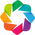

:Overlay
   .Scatter.I :Scatter   [A]   (B_A,Element)
   .Curve.I   :Curve   [A]   (B_A)
   .Labels.I  :Labels   [A,B_A]   (Element)

In [ ]:
import pandas as pd
import numpy as np
import holoviews as hv
hv.extension('bokeh')
from bokeh.plotting import show
import hvplot.pandas  # Importando o hvplot para DataFrames
import panel as pn


dataFile = Path("../../data/misc/AME2020.txt")
# Carregar os dados
data = pd.read_csv(dataFile, sep=r'\s+', comment='#')
A = np.array(data['A'])
elem = np.array(data['EL'])
BA = np.array(data['B_A'])

A2N = {4: 'He', 12: 'C', 16: 'O', 20: 'Ne', 24: 'Mg', 28: 'Si', 32: 'S', 36: 'Ar', 40: 'Ca'}

# Criar DataFrame para plotagem
df = pd.DataFrame({'A': A, 'B_A': BA, 'Element': [A2N.get(a, '') for a in A]})

# Função para gerar o plot
def plot(log_x=False):
    plot = df.hvplot.scatter(
        x='A', y='B_A', 
        logx=log_x,
        xlabel='A', ylabel='B/A', 
        title='Gráfico de B/A vs A', 
        hover_cols=['Element']
    )
    line = df.hvplot.line(x='A', y='B_A', logx=log_x)
    labels = hv.Labels(df, ['A', 'B_A'], 'Element').opts(text_baseline='bottom', yoffset=1, fontsize=1)
    return (plot * line * labels)

# Botão para alternar entre linear e log
log_toggle = pn.widgets.Toggle(name='Escala Log X', button_type='success')

@pn.depends(log_toggle.param.value)
def update_plot(log_x):
    return plot(log_x)

# Layout
#plot = pn.Column(log_toggle, update_plot).servable()
plot(log_x=False)
plot(log_x=True)

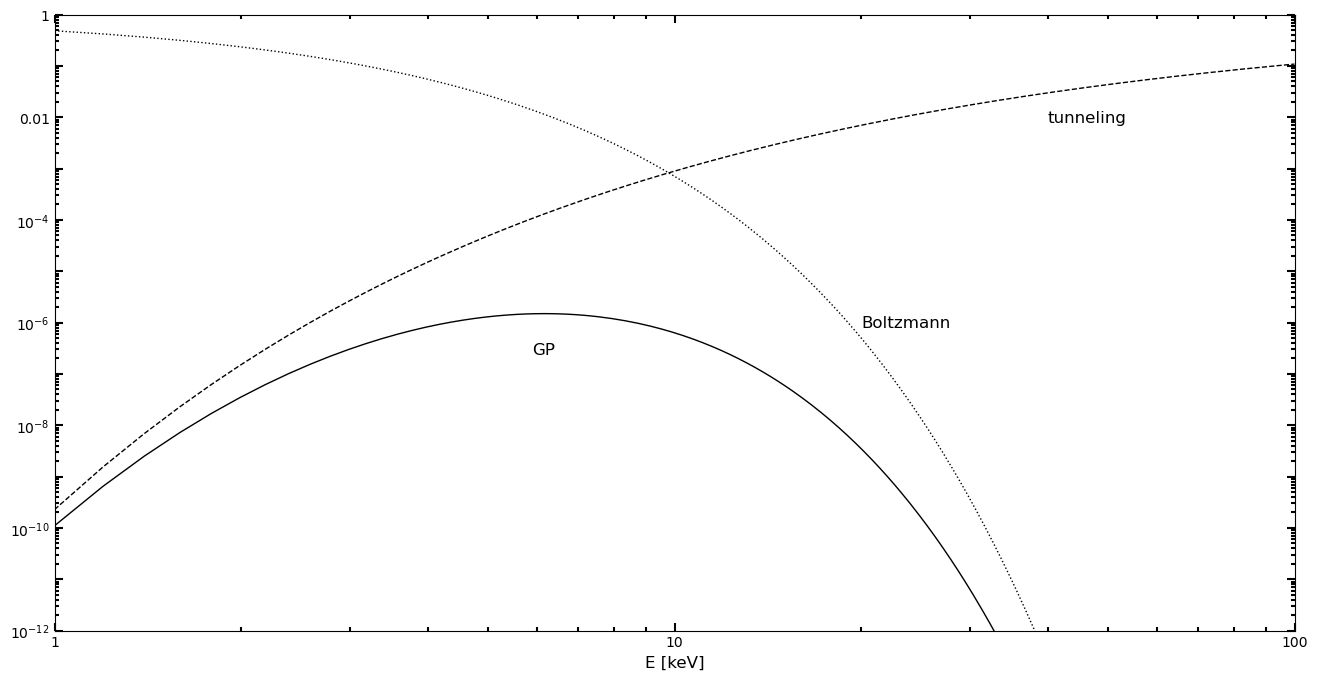

In [ ]:
# pp Gamow energy

EG = 493. # keV

# Temperature

T = 1.6e7 # K
k = 8.6173303e-8 # Boltzman constant in keV/K

# Range of energies in keV

E = np.linspace(1.0,100.0,501)

Boltz = np.exp(-E/(k*T))
Gamow = np.exp(-np.sqrt(EG/E))
Total = Boltz*Gamow

# limits
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

minE = 1.0 # keV
maxE = 100.0
minY = 1.0e-12 # dimensionless
maxY = 1.0
axisFontSize = 12
fig,ax = plt.subplots(figsize=(16, 8))
lwidth = 1.5    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)
ax.set_xlim(minE, maxE)
ax.set_xlabel(r'E [keV]',fontsize=axisFontSize)
ax.set_xscale('log')
ax.set_xticks([1.,10.,100.])
ax.set_xticklabels(['1','10','100'])

ax.set_ylim(minY,maxY)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([1.0e-12, 1.0e-11, 1.0e-10, 1.0e-9, 1.0e-8, 1.0e-7, 1.0e-6, 1.0e-5, 1.0e-4, 0.001, 0.01, 0.1, 1.0])
ax.set_yticklabels([r'10$^{-12}$',' ',r'10$^{-10}$',' ',r'10$^{-8}$',' ',r'10$^{-6}$',' ',r'10$^{-4}$',' ', '0.01',' ','1'])

# Boltzmann Factor

ax.plot(E,Boltz,':',color='black',lw=1)
ax.text(20.0,1e-6,'Boltzmann',color='black',fontsize=axisFontSize,ha='left',va='center')

# Gamow Factor

ax.plot(E,Gamow,'--',color='black',lw=1)
ax.text(40.0,0.01,'tunneling',color='black',fontsize=axisFontSize,ha='left',va='center')

# Product Boltzmann * Gamow

ax.plot(E,Total,'-',color='black',lw=1)
ax.text(E[np.where(Total==np.max(Total))],0.2*np.max(Total),'GP',va='center',ha='center',fontsize=axisFontSize)

# Make the plot

plt.show()


# Estimativa da Barreira de Potencial Coulombiano na Fusão Nuclear

A barreira de potencial coulombiano para a fusão de dois prótons pode ser estimada pela energia potencial elétrica:

$$
U = \frac{1}{4\pi\varepsilon_0} \frac{e^2}{r}
$$


A energia térmica média das partículas no núcleo do Sol é:

$$
E_{\text{térmica}} = k_B T
$$



## Comparação e Profundidade do Poço de Potencial

A barreira de Coulomb (1.71 MeV) é muito maior do que a energia térmica média das partículas (0.0013 MeV). Isso sugere que, para a fusão ocorrer no Sol, os prótons precisam atravessar essa barreira via efeito túnel quântico.

A profundidade efetiva do "poço" de interação nuclear pode ser estimada considerando que, ao se aproximarem o suficiente para a força forte agir, os prótons se ligam, liberando energia adicional. Essa profundidade está na ordem de dezenas de MeV.


In [ ]:
import astropy.constants as const

# Carga elementar (Coulomb)
e = const.e.si

# Permissividade do vácuo (F/m)
epsilon0 = epsilon_0 * u.Unit("F/m")

# Raio aproximado do próton (m)
r_proton = physical_constants["proton rms charge radius"][0] * u.m

# Constante de Boltzmann (J/K)
k_B = const.k_B

# Temperatura do núcleo do Sol (K)
T_core = T_sun

# Estimativa da barreira de potencial coulombiana (J)
U = (1 / (4 * np.pi * epsilon0)) * (e * e / r_proton)

# Converter para MeV (1 eV = 1.602e-19 J, 1 MeV = 1e6 eV)
U_MeV = U.to(u.eV, u.mass_energy()).to(u.MeV)

# # Energia térmica média (J)
E_thermal = k_B * T_core

# # Converter para MeV
E_thermal_MeV = E_thermal.to(u.eV, equivalencies=u.temperature_energy()).to(u.MeV)

U_MeV, E_thermal_MeV

(<Quantity 1.7127143 MeV>, <Quantity 0.00123472 MeV>)

$$ B=(Zm_{p}+(A-Z)m_{n} - Zm_e - M)c^2$$

In [ ]:
m_e = physical_constants["electron mass"][0] * u.kg
m_p = physical_constants["proton mass"][0] * u.kg
m_n = physical_constants["neutron mass"][0] * u.kg
M = physical_constants['deuteron mass'][0] * u.kg
Z = 1
A = 2

B = (Z*m_p + (A-Z)*m_n - M - Z*m_e).to(u.eV, u.mass_energy()).to(u.MeV)
B

<Quantity 1.71356739 MeV>

<table class="version-table">
    <tr><th>Autor</th><td>Luciano Barosi</td></tr>
    <tr><th>Última Modificação</th><td>07-03-2022</td></tr>
    <tr><th>Alterações</th><td>Descrição das modificações</td></tr>
</table>